<a href="https://colab.research.google.com/github/wphall/CO2-Equilibrium/blob/main/Loops_and_Plotting_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a previous [self-guided exercise about solving equilibrium problems using Python](https://colab.research.google.com/drive/1UyyLiq0b4od7nEySMXhpd4WJ78axGU_O?usp=sharing) we developed the following code to use non-linear least squares fitting to calculate the pH of a solution of sodium hydroxide.

In [ ]:
from scipy.optimize import fsolve
import numpy as np

def FunNaOH(x):
  # x[0]=hdr
  # x[1]=hox
  # x[2]=sod
  f0=x[0]*x[1]-Kw      #Kw=hdr*hox so 0=hdr*hox-Kw
  f1=x[0]+x[2]-x[1]    #charge balance
  f3=x[2]-F            #mass balance
  res=np.array([f0, f1, f3])
  return res

Kw=1e-14
F=1.5e-8

sod=F
hox=F+1.0e-7
hdr=Kw/hox
estimate=np.array([hdr,hox,sod])

print('concentrations into fsolve= ',estimate)
pHest=-np.log10(estimate[0])
print("estimated pH = "+"{:.2f}".format(pHest))
residualsEstimate=FunNaOH(estimate)
print('residuals of the estimates = ',residualsEstimate)

result=fsolve(FunNaOH,estimate)
print('concentrations out of fsolve= ',result)
residualsSolved=FunNaOH(result)
print('residuals of the solved equations = ',residualsSolved)

pHsol=-np.log10(result[0])
print("solved pH = "+"{:.2f}".format(pHsol))

concentrations into fsolve=  [8.69565217e-08 1.15000000e-07 1.50000000e-08]
estimated pH = 7.06
residuals of the estimates =  [ 0.00000000e+00 -1.30434783e-08  0.00000000e+00]
concentrations out of fsolve=  [9.27808556e-08 1.07780856e-07 1.50000000e-08]
residuals of the solved equations =  [0. 0. 0.]
solved pH = 7.03


In this notebook we will calculate the pH of a sodium hydroxide solution ranging from 0 to 1 $\mathrm{\mu M}$ in increments of 0.01 $\mathrm{\mu M}$.

**Activity**: Make an array ("concs") to hold the values for the molarties, and a pandas dataframe ("dfRangeConc")to hold the 3 concentrations at each molarity of NaOH.

For the array, numpy has two similar functions for creating arrays spanning a range of values.  The first is [np.arange(start, stop, step)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and the second is [np.linspace(start, stop, num)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).  Either works well, but they are subtley different as the stop value for "arange" is not incluse and the stop value for linspace is inclusive.  Make your array to have approximately at least 100 integer values in evenly-spaced integer increments.

For the dataframe make the indexs be concentration ("concs") and make the columns be the three letter codes for each of the 7 species ["hdr","hox","sod"].

In [1]:
import numpy as np                    #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt       #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                   #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve     #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table   #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

def FunNaOH(x):
  # x[0]=hdr
  # x[1]=hox
  # x[2]=sod
  f0=x[0]*x[1]-Kw      #Kw=hdr*hox so 0=hdr*hox-Kw
  f1=x[0]+x[2]-x[1]    #charge balance
  f3=x[2]-F            #mass balance
  res=np.array([f0, f1, f3])
  return res

Kw=1e-14

concs=np.arange(0,1e-6,1e-8)
print("concentrations = ",concs)
print("Number of concentrations = ",len(concs))

concIdxs=np.arange(len(concs))
print("Index of each concentration ",concIdxs)

dfRangeConc=pd.DataFrame(index=concs,columns=["hdr","hox","sod"])
dfRangeConc

concentrations =  [0.0e+00 1.0e-08 2.0e-08 3.0e-08 4.0e-08 5.0e-08 6.0e-08 7.0e-08 8.0e-08
 9.0e-08 1.0e-07 1.1e-07 1.2e-07 1.3e-07 1.4e-07 1.5e-07 1.6e-07 1.7e-07
 1.8e-07 1.9e-07 2.0e-07 2.1e-07 2.2e-07 2.3e-07 2.4e-07 2.5e-07 2.6e-07
 2.7e-07 2.8e-07 2.9e-07 3.0e-07 3.1e-07 3.2e-07 3.3e-07 3.4e-07 3.5e-07
 3.6e-07 3.7e-07 3.8e-07 3.9e-07 4.0e-07 4.1e-07 4.2e-07 4.3e-07 4.4e-07
 4.5e-07 4.6e-07 4.7e-07 4.8e-07 4.9e-07 5.0e-07 5.1e-07 5.2e-07 5.3e-07
 5.4e-07 5.5e-07 5.6e-07 5.7e-07 5.8e-07 5.9e-07 6.0e-07 6.1e-07 6.2e-07
 6.3e-07 6.4e-07 6.5e-07 6.6e-07 6.7e-07 6.8e-07 6.9e-07 7.0e-07 7.1e-07
 7.2e-07 7.3e-07 7.4e-07 7.5e-07 7.6e-07 7.7e-07 7.8e-07 7.9e-07 8.0e-07
 8.1e-07 8.2e-07 8.3e-07 8.4e-07 8.5e-07 8.6e-07 8.7e-07 8.8e-07 8.9e-07
 9.0e-07 9.1e-07 9.2e-07 9.3e-07 9.4e-07 9.5e-07 9.6e-07 9.7e-07 9.8e-07
 9.9e-07]
Number of concentrations =  100
Index of each concentration  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 3

,hdr,hox,sod
0.000000e+00,NaN,NaN,NaN
1.000000e-08,NaN,NaN,NaN
2.000000e-08,NaN,NaN,NaN
3.000000e-08,NaN,NaN,NaN
4.000000e-08,NaN,NaN,NaN
...,...,...,...
9.500000e-07,NaN,NaN,NaN
9.600000e-07,NaN,NaN,NaN
9.700000e-07,NaN,NaN,NaN
9.800000e-07,NaN,NaN,NaN


We can now loop through each of the concentrations in the range  In each pass we will make an initial guess, use fsolve to find the concentrations that fit the constraints, and store the results in the dataframe.  Once the dataframe is filled, we can calculate and plot the pH of the solution.

In [2]:
for F,Index in zip(concs,concIdxs):     #this loop will step through the mixing ratios and their indexes
  print("Concentration=",F,end=' ')           #print the pressure to the screen, you may want to comment this later

  sod=F
  hox=F+1.0e-7
  hdr=Kw/hox
  estimate=np.array([hdr,hox,sod])

  xCalc=fsolve(FunNaOH,estimate) #SciPy does the work!
  dfRangeConc.iloc[Index,:]=xCalc        #store the result in the appropriate spot in the dataframe
  pHCalc=-np.log10(xCalc[0])          #hydronium ion has an index of 4 (5th value, but indexing starts with 0!)
  print("pH=",pHCalc)                 #print the calculated pH, you may want to comment this later

dfRangeConc #display the dataframe

Concentration= 0.0 pH= 7.0
Concentration= 1e-08 pH= 7.021705686457116
Concentration= 2e-08 pH= 7.04335738957182
Concentration= 3.0000000000000004e-08 pH= 7.064902322454731
Concentration= 4e-08 pH= 7.086290018533424
Concentration= 5e-08 pH= 7.107473318706102
Concentration= 6.000000000000001e-08 pH= 7.128409173004323
Concentration= 7e-08 pH= 7.149059227444109
Concentration= 8e-08 pH= 7.169390187123792
Concentration= 9e-08 pH= 7.189373965018154
Concentration= 1e-07 pH= 7.208987640249979
Concentration= 1.1e-07 pH= 7.228213258905117
Concentration= 1.2000000000000002e-07 pH= 7.247037514688775
Concentration= 1.3e-07 pH= 7.265451346672453
Concentration= 1.4e-07 pH= 7.283449488172482
Concentration= 1.5e-07 pH= 7.301029995663981
Concentration= 1.6e-07 pH= 7.318193780666201
Concentration= 1.7000000000000001e-07 pH= 7.3349441615454944
Concentration= 1.8e-07 pH= 7.351286446748078
Concentration= 1.9e-07 pH= 7.367227556372467
Concentration= 2e-07 pH= 7.3827756853379105
Concentration= 2.1e-07 pH= 7.39

,hdr,hox,sod
0.000000e+00,0.0,0.0,0.0
1.000000e-08,0.0,0.0,0.0
2.000000e-08,0.0,0.0,0.0
3.000000e-08,0.0,0.0,0.0
4.000000e-08,0.0,0.0,0.0
...,...,...,...
9.500000e-07,0.0,0.000001,0.000001
9.600000e-07,0.0,0.000001,0.000001
9.700000e-07,0.0,0.000001,0.000001
9.800000e-07,0.0,0.000001,0.000001


Some links about plotting with matlab

https://matplotlib.org/stable/users/explain/quick_start.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://matplotlib.org/stable/api/markers_api.html

Text(0, 0.5, 'pH')

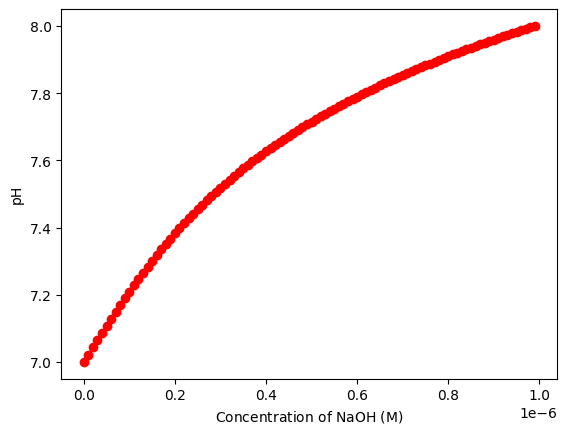

In [3]:
hyds=np.array(dfRangeConc['hdr'],dtype=float)
pHs=-np.log10(hyds)

fig,ax=plt.subplots()
ax.plot(concs,pHs, linestyle='solid', marker='o', color='red')
ax.set_xlabel("Concentration of $\mathrm{NaOH}$ (M)")
ax.set_ylabel("pH")

At this point you can go back to the [$\mathrm{CO_2}$ modeling activity](https://colab.research.google.com/drive/1JmzYY-f_uMBbdWO7Q5ehC9B1xWakEKcJ?usp=sharing), or work in the code block below customizing your plot.